# Hands On #1 
## Proceso ETL y Exploración Simple
## TEL-354: Minería de Datos 2020-1 (20200420)
### Prof. Mauricio Araya

### 1.- Extract, Transfer and Load

**1.1**- Busque el ``Toy Dataset`` por Carlo Lepelaars del sitio web **Kaggle**. Kaggle es un portal donde uno puede bajar datasets asdociados a un desafío. Este desafío puede traducirse en premios en dinero, prestigio, regalos o (como ahora en la contingencia COVID-19) el premio puede ser solo aportar para solucionar un problema. 

En la celda siguiente, escriba en Markdown la información de **contexto** del dataset y el link a donde lo encontró. Agregue además una tabla con la descripción de cada columna.

Se trata sobre los datos generales de un grupo de personas, su ciudad su ingreso y ver si están enfermas o no.

**PREGUNTA**: ¿A qué tipo de datos corresponde cada columna? (texto, categórico, natural, real, etc.). Agregué esta información a su tabla de deescripción

**RESPUESTA:**: 
Number: Natural
City: Texto
Gender: Categórico
Age: Natural
Income: Flotante
Illness: Categórico

**1.2**- Descargue el dataset y guardelo en el mismo directorio de trabajo en el que está este notebook. 

**PREGUNTA**: En la siguiente celda (en Markdown), explique cuál es el tipo de archivo del dataset copiando alguna breve explicación que encuentre en google, y referenciando la fuente con un link clickeable. Responda además, ¿Qué otros formatos de archivos podrían contener la misma información para este ``Toy Dataset``? Agregue un link además con una explicación de como convertir el ``.csv`` a otro formato.

Un archivo CSV (valores separados por comas) es un tipo especial de archivo que puede crear o editar en Excel. En lugar de almacenar la información en columnas, los archivos CSV almacenan datos separados por comas.

Fuente: https://support.microsoft.com/es-es/office/crear-o-editar-archivos-csv-para-importarlos-a-outlook-4518d70d-8fe9-46ad-94fa-1494247193c7#:~:text=Un%20archivo%20CSV%20

Transformar CSV a Excel: https://www.geeknetic.es/Guia/1829/Como-convertir-archivos-CSV-a-Excel.html


**1.3**- Revise los notebooks en el aula para poder cargar el dataset en memoria. Para esto ocupe la biblioteca ``pandas``, que es un gestor de tablas con compatibilidad en iPython notebooks. Verifique que el objeto DataFrame generado "sabe" como desplegarse en un notebook. Busque además en la documentación de ``pandas`` como conocer el tipo de datos de cada columna e imprima esto en una nueva celda.

In [1]:
import pandas as pd
data_read = pd.read_csv("toy_dataset.csv")
peopledf = pd.DataFrame(data_read)
peopledf.head()


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [2]:
peopledf.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

**PREGUNTA**: ¿La información de tipos que usted escribió en el punto 1.1 está completamente contenida en lo que ``pandas`` reporta? Explique en no más de 3 frases.

Si lo está, excepto en el caso de las variables que no son números sino que son strings. 

### 2- Exploración Simple de Datos

**2.1**- El objeto básico de ``pandas`` se llama ``DataFrame``. Busque como imprimir una *estadística descriptiva* de los datos (media, desviación estándar, percentiles, etc.).

In [3]:
peopledf.describe(include="all")

,Number,City,Gender,Age,Income,Illness
count,150000.000000,150000,150000,150000.000000,150000.000000,150000
unique,NaN,8,2,NaN,NaN,2
top,NaN,New York City,Male,NaN,NaN,No
freq,NaN,50307,83800,NaN,NaN,137861
mean,75000.500000,NaN,NaN,44.950200,91252.798273,NaN
std,43301.414527,NaN,NaN,11.572486,24989.500948,NaN
min,1.000000,NaN,NaN,25.000000,-654.000000,NaN
25%,37500.750000,NaN,NaN,35.000000,80867.750000,NaN
50%,75000.500000,NaN,NaN,45.000000,93655.000000,NaN
75%,112500.250000,NaN,NaN,55.000000,104519.000000,NaN


**PREGUNTA**: Solo para algunas columnas hace sentido hacer una descripción estadística. ¿Cuáles son y por qué? 

**R**/: Porque algunas variables son categóricas lo cual no tiene sentido calcular sus valores estadisticos, y hay variables numéricas, que mo se pueden obtener su clasificación ni su frecuencia.

**2.2**- Utilice la biblioteca de visualización llamada ``matplotlib`` para hacer un gráfico de dispersión de la edad y el ingreso (no tenga miedo a hacer copy/paste). Modifique su gráfico para imprimir de distinto color los individuos enfermos. Puede modificar con el parámetro alpha para obtener una mejor visualización.

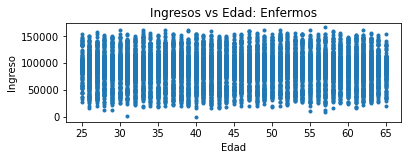

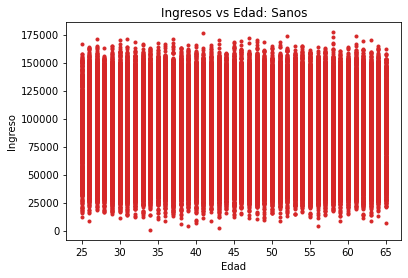

In [4]:
import matplotlib.pyplot as plt 
enfermos = peopledf.loc[lambda x: x["Illness"]== "Yes"]
sanos = peopledf.loc[lambda x: x["Illness"]== "No"]

plt.subplot(2,1,1)

plt.scatter(enfermos["Age"],enfermos["Income"] ,marker=".",color="Tab:Blue")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.title("Ingresos vs Edad: Enfermos")
plt.show()
plt.scatter(sanos["Age"],sanos["Income"] ,marker=".",color = "Tab:Red")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.title("Ingresos vs Edad: Sanos")
plt.show()

**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados? (máximo 3)

**2.3**- Utilice ahora la biblioteca ``seaborn`` y su función ``pairplot`` sobre el DataFrame para hacer visualizaciones avanzadas de forma automática. Puede por ejemplo establecer el color de distintas variables categóricas utilizando ``hue``. 

In [5]:
import seaborn as sns
#sns.pairplot(peopledf,hue="Illness")
#sns.pairplot(peopledf,hue="Gender")


In [6]:
#sns.pairplot(peopledf,hue="City")

**PREGUNTA**: ¿Qué conclusiones puede usted sacar sobre la distribución de la enfermedad, el género y la ciudad?

### 3- Subgrupos
**3.1** Una herramienta importante en el análisis de variables categóricas es el agrupar por sus valores. La función ``groupby`` de ``pandas`` permite realizar una vista de esta forma. Agrupe los datos por ciudad e imprima la cantidad de individuos que hay en cada ciudad. Además describa las variables agrupadas de enfermedad e ingreso. 

In [7]:
citygroup = peopledf.groupby("City")
for ciudad in citygroup.groups.keys():
    print(ciudad,citygroup.size()[ciudad])
    


Austin 12292
Boston 8301
Dallas 19707
Los Angeles 32173
Mountain View 14219
New York City 50307
San Diego 4881
Washington D.C. 8120


In [14]:
citygroup["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Austin,12292.0,90277.513423,10996.636090,50602.0,82891.75,90278.5,97755.5,132302.0
Boston,8301.0,91554.571497,11216.142107,48425.0,83892.00,91607.0,99110.0,132348.0
Dallas,19707.0,45252.231187,11263.867909,-654.0,37720.50,45268.0,53021.5,91479.0
Los Angeles,32173.0,95264.155410,11187.234580,51131.0,87589.00,95291.0,102935.0,141249.0
Mountain View,14219.0,135078.415782,11227.302304,95202.0,127482.00,135220.0,142738.5,177157.0
New York City,50307.0,96857.131393,11210.580111,55538.0,89184.00,96920.0,104516.5,147170.0
San Diego,4881.0,100756.209178,11149.283188,64941.0,93193.00,100859.0,108394.0,140190.0
Washington D.C.,8120.0,70991.612808,11079.854228,33335.0,63571.75,71230.0,78563.5,107704.0


In [13]:
citygroup["Illness"].describe()

,count,unique,top,freq
City,,,,
Austin,12292,2,No,11281
Boston,8301,2,No,7615
Dallas,19707,2,No,18094
Los Angeles,32173,2,No,29605
Mountain View,14219,2,No,13041
New York City,50307,2,No,46286
San Diego,4881,2,No,4487
Washington D.C.,8120,2,No,7452


In [15]:
#No era necesario
#for city in citygroup.groups.keys():
#    df = citygroup.get_group(city)
#    enfermos = df.loc[lambda x: x["Illness"]== "Yes"]
#    sanos = df.loc[lambda x: x["Illness"]== "No"]
    
#    print("Enfermos:",enfermos["Illness"].count(),"Sanos",sanos["Illness"].count())
    
#    plt.subplot(2,1,1)
    
#    titulo = city + " Ingresos vs Edad: Enfermos"
#    plt.scatter(enfermos["Age"],enfermos["Income"] ,marker=".",color="Tab:Blue")
#    plt.xlabel("Edad")
#    plt.ylabel("Ingreso")
#    plt.title(titulo)
#    plt.show()
#    titulo = city + " Ingresos vs Edad: Sanos"
#    plt.scatter(sanos["Age"],sanos["Income"] ,marker=".",color = "Tab:Red")
#    plt.xlabel("Edad")
#    plt.ylabel("Ingreso")
#    plt.title(titulo)
#    plt.show()



**PREGUNTA**: ¿Qué conclusiones simples puede usted sacar de estas descripciones? (solo 2)

**3.2** Calcule el ratio de personas enfermas por ciudad y comparela con el ingreso medio en cada ciudad.

In [18]:
ratioincomedf = dict()
for city in citygroup.groups.keys():
    df = citygroup.get_group(city)
    enfermos = df.loc[lambda x: x["Illness"]== "Yes"]
    ratio = enfermos["Illness"].count()/citygroup.size()[city]
    meanincome = citygroup.mean()["Income"][city]
    ratioincomedf[city] = (ratio,meanincome)
dfplot = pd.DataFrame(ratioincomedf,index=["Ratio","IncomeMean"]).transpose()


,Ratio,IncomeMean
Austin,0.082249,90277.513423
Boston,0.082641,91554.571497
Dallas,0.081849,45252.231187
Los Angeles,0.079818,95264.155410
Mountain View,0.082847,135078.415782
New York City,0.079929,96857.131393
San Diego,0.080721,100756.209178
Washington D.C.,0.082266,70991.612808


**PREGUNTA FINAL**: ¿Existe una relación entre el ratio de personas enfermas y el ingreso medio? Soporte su respuesta en los gráficos y/o tablas generadas hasta este punto. 